### Preprocessing

In [3]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [4]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# import custom packages
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [16]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Hitters.csv"
Hitters = pd.read_csv(url)

In [17]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [18]:
# clean data
print(Hitters.shape)
Hitters = Hitters.dropna()

(322, 21)


In [19]:
Hitters.shape

(263, 21)

In [20]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [21]:
# converting categorical data into dummy variable
Hitters_1 = pd.get_dummies(Hitters, drop_first=True, columns=['League', 'Division', 'NewLeague'])
Hitters_1.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,632,43,10,475.0,1,1,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,880,82,14,480.0,0,1,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,200,11,3,500.0,1,0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,805,40,4,91.5,1,0,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,282,421,25,750.0,0,1,0


### Principal Components Regression

In [22]:
from sklearn.preprocessing import StandardScaler, scale
import warnings
warnings.filterwarnings('ignore')
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary
pca = PCA()
X_scaled = pca.fit_transform(scale(X))
explained_variance_ratio = np.var(X_scaled, axis=0) / np.sum(np.var(X_scaled, axis=0))
EVR = pd.DataFrame(np.cumsum(np.round(explained_variance_ratio, decimals=4)*100), columns=['explained variance ratio'])
EVR.index = EVR.index + 1
EVR

,explained variance ratio
1,38.31
2,60.15
3,70.84
4,79.03
5,84.29
6,88.63
7,92.26
8,94.96
9,96.28
10,97.25


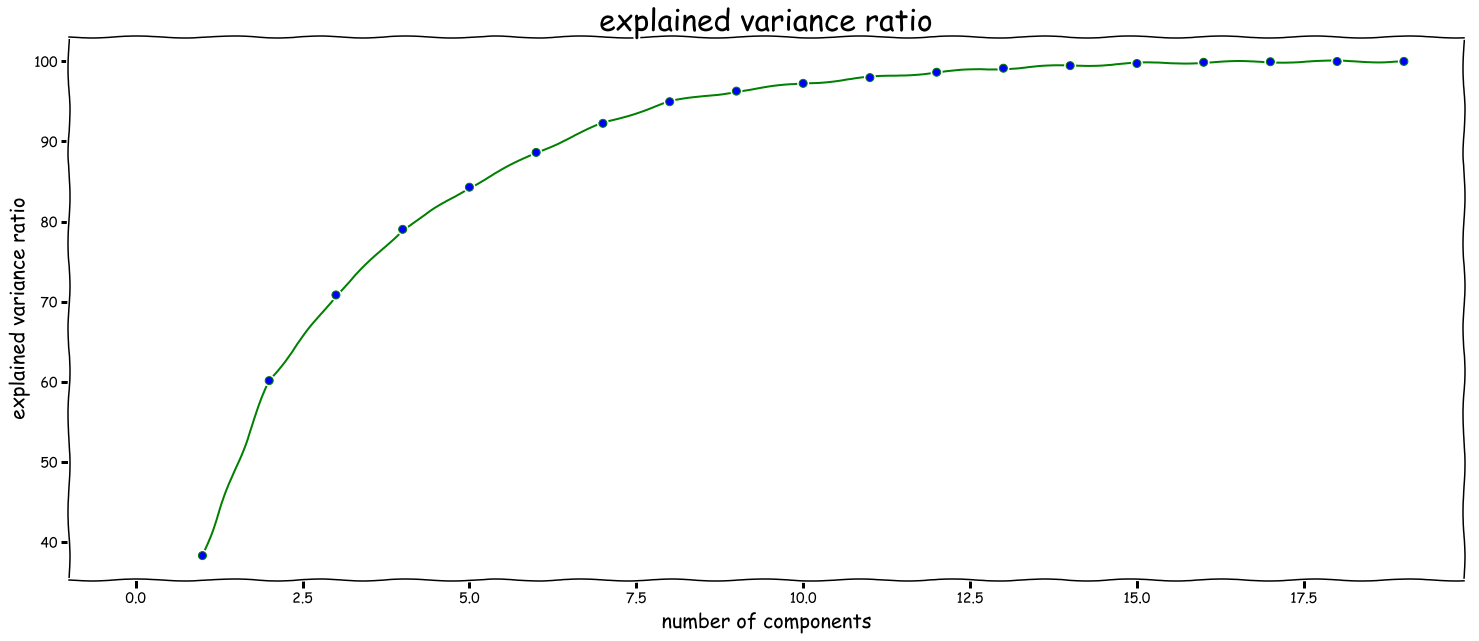

In [23]:
# Plot of explained variance ratio
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(EVR, '-', marker = 'o', markerfacecolor='blue', markersize=8, color='green')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('explained variance ratio', fontsize=20)
plt.title('explained variance ratio', fontsize=30)
plt.xlim(xmin=-1);

**Explained variance ratio is the percentage of variance explained in the predictors and in the response using different
number of components.**

In [24]:
# cross validation
from sklearn.model_selection import cross_val_score, KFold
n = len(X_scaled)
kf10 = KFold(n_splits=10, shuffle=True, random_state=1)

lm = LinearRegression()
RMSEPD = []

# Calculate RMSE with only the intercept (i.e. no principal components)
MSE = -1*cross_val_score(lm, np.ones((n,1)), y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
RMSEPD.append(pow(MSE, 0.5))

# Calculate MSE using CV for the 19 principle components
for i in np.arange(1, 20):
    MSE = -1*cross_val_score(lm, X_scaled[:,:i], y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
    RMSEPD.append(pow(MSE, 0.5))
RMSEdf = pd.DataFrame(data=RMSEPD, columns=['RMSE'])
RMSEdf

,RMSE
0,450.891534
1,349.938701
2,350.147974
3,348.987024
4,346.231223
5,341.894431
6,339.656005
7,341.743988
8,345.190993
9,346.599922


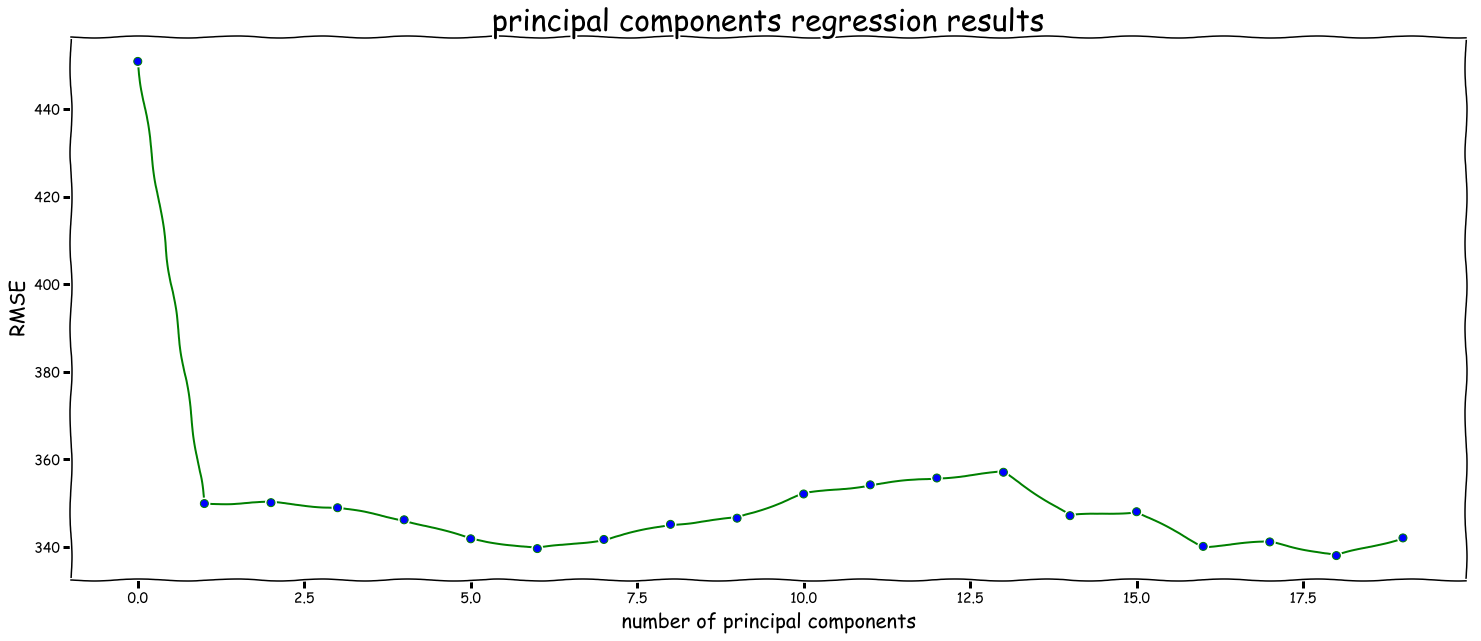

In [25]:
# Plot of PCR results
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(RMSEdf, '-', marker = 'o', markerfacecolor='blue', markersize=8, color='green')
plt.xlabel('number of principal components', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
plt.title('principal components regression results', fontsize=30)
plt.xlim(xmin=-1);

**We see that the lowest MSE occurs for 18 principal components. This is not too different from the total number of 
variables(=19). So, there is not much dimension reduction to do and therefore PCR is not too useful. However, the model's RMSE drops significantly after adding just one variable and remains roughly the same which suggests that just
a small number of components might suffice.**

### Split dataset into training and test dataset (and standardise them)

In [26]:
from sklearn.model_selection import train_test_split
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Principal components regression - cross validation

In [27]:
pca2 = PCA()
X_train_scaled = pca2.fit_transform(scale(X_train))
n = len(X_train_scaled)
n

176

In [28]:
kf10 = KFold(n_splits=10, shuffle=True, random_state=1)

lm = LinearRegression()
RMSEPD = []

# Calculate RMSE with only the intercept (i.e. no principal components)
MSE = -1*cross_val_score(lm, np.ones((n,1)), y_train.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
RMSEPD.append(pow(MSE, 0.5))

# Calculate MSE using CV for the 19 principle components
for i in np.arange(1, 20):
    MSE = -1*cross_val_score(lm, X_train_scaled[:,:i], y_train.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
    RMSEPD.append(pow(MSE, 0.5))
RMSEdf = pd.DataFrame(data=RMSEPD, columns=['RMSE'])
RMSEdf

,RMSE
0,429.934341
1,317.031959
2,313.458976
3,313.842282
4,312.840402
5,310.525000
6,311.334391
7,314.422104
8,314.779175
9,315.329993


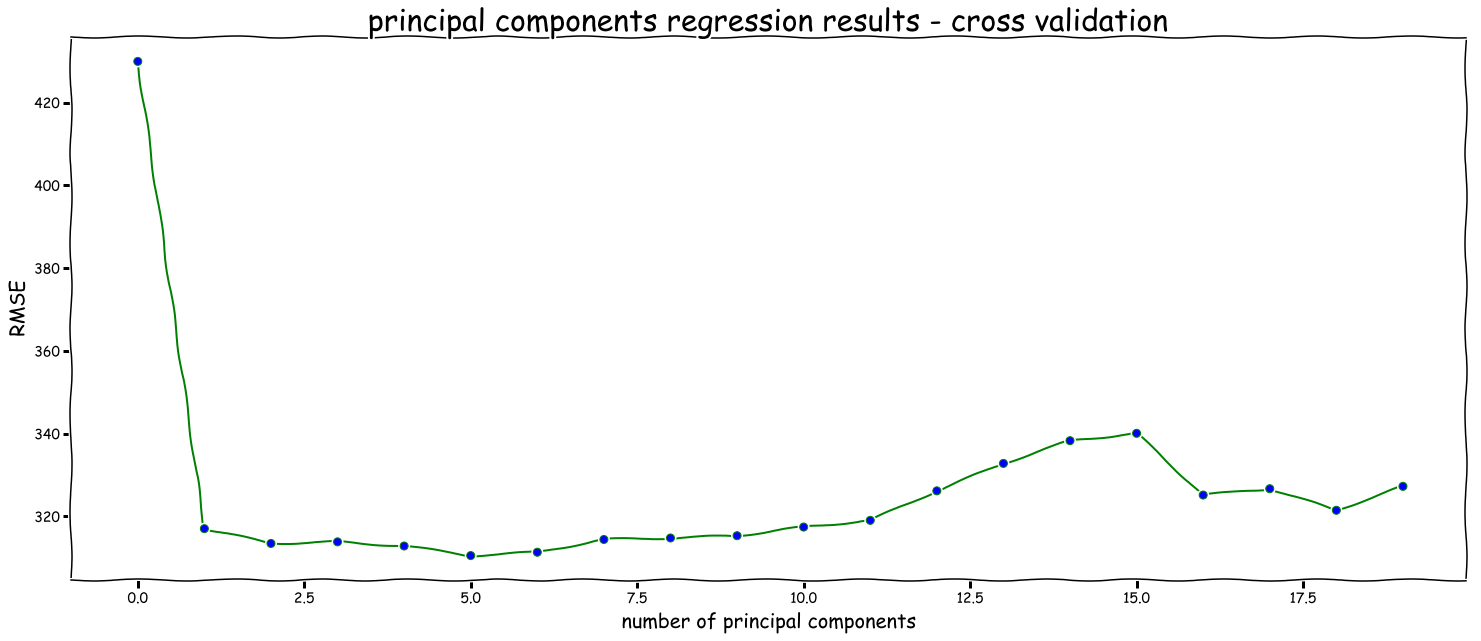

In [29]:
# Plot of PCR results
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(RMSEdf, '-', marker = 'o', markerfacecolor='blue', markersize=8, color='green')
plt.xlabel('number of principal components', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
plt.title('principal components regression results - cross validation', fontsize=30)
plt.xlim(xmin=-1);

**We notice that the smallest RMSE occurs at 5 principal components. Therefore, we will perform principal component
regression with 5 principal components.**

In [30]:
X_test_scaled = pca2.transform(scale(X_test))[:,:6]
lm2fit = LinearRegression().fit(X_train_scaled[:,:6], y_train)

lm2pred = lm2fit.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test, lm2pred)))

404.70895960579315


**This MSE from principal components regression (PCR)  is comparable to that of ridge regression (=152308.5473577816) and 
lasso regression (=150198.92762434622). However, because PCR does not produce coefficient estimates like other methods,
it is much more difficult to interpret.**

In [31]:
explained_variance_ratio_test = np.var(X_test_scaled, axis=0) / np.sum(np.var(X_test_scaled, axis=0))
EVR6 = pd.DataFrame(np.cumsum(np.round(explained_variance_ratio_test, decimals=4)*100), columns=['Explained Variance Ratio'])
EVR6.index = EVR6.index + 1
EVR6

,Explained Variance Ratio
1,45.54
2,68.44
3,79.61
4,89.47
5,95.33
6,100.01
